# Sales Analysis

In [1]:
# imporing libraries

import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

C:\Users\tahir\AppData\Local\Temp\ipykernel_19200\2856807446.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Merging 12 months of sales data into a single csv file

In [3]:
jan_data = pd.read_csv(r"C:\Users\tahir\jupyter-notebooks\sales-analysis-project\sales-data\Sales_January_2019.csv")
feb_data = pd.read_csv(r"C:\Users\tahir\jupyter-notebooks\sales-analysis-project\sales-data\Sales_February_2019.csv")
mar_data = pd.read_csv(r"C:\Users\tahir\jupyter-notebooks\sales-analysis-project\sales-data\Sales_March_2019.csv")
apr_data = pd.read_csv(r"C:\Users\tahir\jupyter-notebooks\sales-analysis-project\sales-data\Sales_April_2019.csv")
may_data = pd.read_csv(r"C:\Users\tahir\jupyter-notebooks\sales-analysis-project\sales-data\Sales_May_2019.csv")
jun_data = pd.read_csv(r"C:\Users\tahir\jupyter-notebooks\sales-analysis-project\sales-data\Sales_June_2019.csv")
jul_data = pd.read_csv(r"C:\Users\tahir\jupyter-notebooks\sales-analysis-project\sales-data\Sales_July_2019.csv")
aug_data = pd.read_csv(r"C:\Users\tahir\jupyter-notebooks\sales-analysis-project\sales-data\Sales_August_2019.csv")
sep_data = pd.read_csv(r"C:\Users\tahir\jupyter-notebooks\sales-analysis-project\sales-data\Sales_September_2019.csv")
oct_data = pd.read_csv(r"C:\Users\tahir\jupyter-notebooks\sales-analysis-project\sales-data\Sales_October_2019.csv")
nov_data = pd.read_csv(r"C:\Users\tahir\jupyter-notebooks\sales-analysis-project\sales-data\Sales_November_2019.csv")
dec_data = pd.read_csv(r"C:\Users\tahir\jupyter-notebooks\sales-analysis-project\sales-data\Sales_December_2019.csv")

In [4]:
# merging all 12 months sales data into [all_months_data] dataframe

all_months_data = pd.concat([jan_data, feb_data, mar_data, apr_data, may_data, jun_data, jul_data, aug_data, sep_data, oct_data, nov_data, dec_data])

In [5]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [6]:
# now we will create a new csv file for our [all_months_data] datafram

all_months_data.to_csv('all_data.csv', index = False)

In [7]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### Cleaning up the data!

Removing rows of NaN

In [8]:
# searched for NA or NaN values in all_data (dataframe)
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df

# dropped or removed all NaN values from all_data
all_data = all_data.dropna(how = 'all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


Find 'Or' and delete it

In [9]:
# extracted and stored those values which do not contain 'Or'

all_data = all_data[all_data['Order Date'].str[:2] != 'Or']

Convert columns to the correct type

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float

C:\Users\tahir\AppData\Local\Temp\ipykernel_6128\3972827987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int
C:\Users\tahir\AppData\Local\Temp\ipykernel_6128\3972827987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float


#### Augment data with additional columns

Add month column

In [11]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head(10)

C:\Users\tahir\AppData\Local\Temp\ipykernel_6128\2921034273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].str[:2]
C:\Users\tahir\AppData\Local\Temp\ipykernel_6128\2921034273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016",1
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001",1
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016",1
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001",1
9,141243,Apple Airpods Headphones,1,150.00,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016",1


Add a sales column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

C:\Users\tahir\AppData\Local\Temp\ipykernel_6128\2354040348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


Add a city column

In [13]:
# apply() function is used to apply a function along an axis of a DataFrame or Series. It allows you to apply a custom or predefined function to each element, row, or column of the DataFrame or Series

# DataFrame.apply(func, axis=0, ...)
# Series.apply(func, ...)

# Here's a breakdown of the parameters:

# func: The function to apply. This can be a custom function or a built-in function.
# axis: Specifies the axis along which the function is applied. By default, it's axis=0, which means the function is applied column-wise. You can set axis=1 to apply the function row-wise.

In [14]:
# all_data['Purchase Address']: This selects the 'Purchase Address' column from the DataFrame all_data

# .apply(...): This applies a function to each element in the selected column

# lambda x: x.split(',')[1]: This is a lambda function that takes an input x (each element of the 'Purchase Address' column) and splits it by commas (,)

# custom function does the same job as lambda

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

C:\Users\tahir\AppData\Local\Temp\ipykernel_6128\1234582048.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


#### Q1. What was the best month for sales? How much was earned that month?

In [15]:
all_data.groupby('Month').sum()['Sales'] # run this command to check sales by month, remove result line
# Least sales: January, Most sales: December

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

##### Ans. Least sales: January ($1,822,256), Most sales: December ($4,613,443)

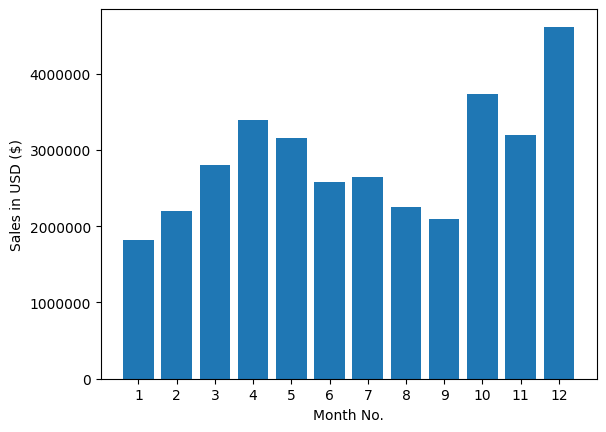

In [16]:
# plotting sales figure using matplotlib

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter # importing scalling formatter

results = all_data.groupby('Month').sum()

months = range(1, 13) # 13 is exclusive it will run from 1 -> 12

plt.bar(months, results['Sales']) # x-axis: months, y-axis: sales
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month No.')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%0.0f')) # for displaying full length sales numbers
plt.show()

#### Q2. Which city had the highest number of sales?

In [17]:
results = all_data.groupby('City').sum()

In [18]:
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta (GA),1412531412611412811412891412961413111413471413...,AA Batteries (4-pack)USB-C Charging CableLight...,16602,2779908.20,01/17/19 00:0901/09/19 18:1401/05/19 16:5101/2...,"385 11th St, Atlanta, GA 30301840 Lincoln St, ...",104794,2795498.58
Austin (TX),1412381412481412751412751412771412951413051413...,Wired HeadphonesFlatscreen TVUSB-C Charging Ca...,11153,1809873.61,01/25/19 11:5901/03/19 21:5401/07/19 16:0601/0...,"387 10th St, Austin, TX 73301363 Spruce St, Au...",69829,1819581.75
Boston (MA),1412341412511412631412651412711412731412791412...,iPhoneApple Airpods HeadphonesBose SoundSport ...,22528,3637409.77,01/22/19 21:2501/24/19 08:1301/11/19 23:3301/0...,"944 Walnut St, Boston, MA 02215414 Walnut St, ...",141112,3661642.01
Dallas (TX),1412661412861412981412991413381413391413551413...,27in 4K Gaming Monitor27in 4K Gaming MonitorLi...,16730,2752627.82,01/02/19 22:2101/02/19 20:3301/21/19 13:2401/3...,"834 4th St, Dallas, TX 75001505 Hickory St, Da...",104620,2767975.40
Los Angeles (CA),1412371412401412421412461412501412521412551412...,27in FHD Monitor27in 4K Gaming MonitorBose Sou...,33289,5421435.23,01/05/19 20:3301/26/19 12:1601/01/19 10:3001/0...,"738 10th St, Los Angeles, CA 90001979 Park St,...",208325,5452570.80
New York City (NY),1412641412681412721412781412821413011413141413...,Apple Airpods HeadphonesAA Batteries (4-pack)A...,27932,4635370.83,01/03/19 09:4601/14/19 10:1301/12/19 13:0901/2...,"937 Highland St, New York City, NY 10001611 El...",175741,4664317.43
Portland (ME),1413291413721413951414071414091416531417681418...,USB-C Charging CableAAA Batteries (4-pack)AAA ...,2750,447189.25,01/01/19 16:0101/26/19 10:0701/29/19 16:2001/0...,"122 5th St, Portland, ME 04101134 Hickory St, ...",17144,449758.27
Portland (OR),1412351412491412561413021413081413301413361413...,Lightning Charging Cable27in FHD MonitorGoogle...,11303,1860558.22,01/28/19 14:1501/05/19 17:2001/29/19 10:4001/1...,"185 Maple St, Portland, OR 97035440 Cedar St, ...",70621,1870732.34
San Francisco (CA),1412361412391412411412431412441412451412471412...,Wired HeadphonesAAA Batteries (4-pack)USB-C Ch...,50239,8211461.74,01/17/19 13:3301/29/19 20:2201/05/19 12:0401/2...,"538 Adams St, San Francisco, CA 94016775 Willo...",315520,8262203.91


##### Ans. San Francisco (CA) had the highest number of sales

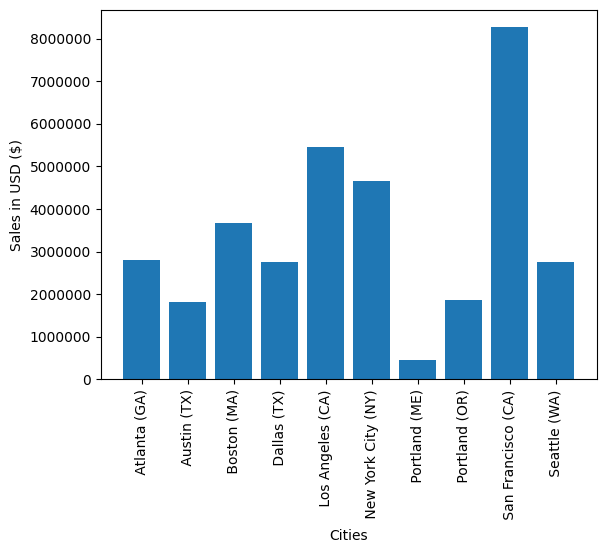

In [19]:
# cities = all_data['City'].unique() -> Why we did not use this? -> In above we grouped [all_data] on basis of City -> San Francisco (CA) did most sales -> all_data['City'].unique() shows Dallas (TX)

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%0.0f')) # for displaying full length sales numbers
plt.show()

#### Q3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [20]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) # converting the values in that column from their original data type (which could be string or some other format) to datetime objects

C:\Users\tahir\AppData\Local\Temp\ipykernel_6128\3404474189.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) # converting the values in that column from their original data type (which could be string or some other format) to datetime objects
C:\Users\tahir\AppData\Local\Temp\ipykernel_6128\3404474189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) # converting the values in that column from their original data type (which could be string or some other format) to datetime obje

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


In [22]:
all_data['Hour'] = all_data['Order Date'].dt.hour # fetch hour from date object
all_data['Minute'] = all_data['Order Date'].dt.minute # fetch minute from date object
all_data.head()

C:\Users\tahir\AppData\Local\Temp\ipykernel_6128\225999913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = all_data['Order Date'].dt.hour # fetch hour from date object
C:\Users\tahir\AppData\Local\Temp\ipykernel_6128\225999913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Minute'] = all_data['Order Date'].dt.minute # fetch minute from date object


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


In [23]:
hours = [hour for hour, df in all_data.groupby('Hour')]

# all_data.groupby('Hour'): This groups the DataFrame all_data by the 'Hour' column. This typically means that the DataFrame is being grouped by the hour component of the 'Order Date' or some other time-related column.

# for hour, df in ...: This is a loop construct that iterates over each group generated by the groupby() operation. In each iteration:

# hour represents the value of the 'Hour' column that is being used for grouping.
# df represents the DataFrame containing the subset of data corresponding to that particular hour.
# hour: This is the value of the 'Hour' column for the current group.

# df: This is the DataFrame containing all rows corresponding to the current hour.

# hours = [...]: This assigns the result of the list comprehension to the variable hours.

# [hour for hour, df in all_data.groupby('Hour')]: This is a list comprehension that iterates over each group generated by groupby('Hour') and extracts the 'Hour' value for each group. It creates a list containing all unique hour values present in the DataFrame all_data.

##### Ans. We should advertise more during peak hours around 11 am (11) or 7 pm (19)

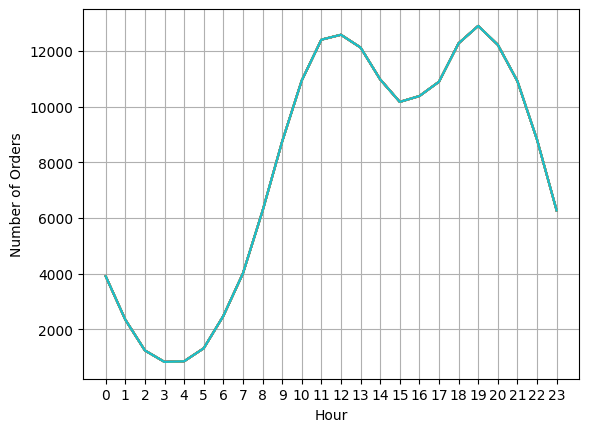

In [24]:
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### Q4. What products are most often sold together?

In [25]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(10)

C:\Users\tahir\AppData\Local\Temp\ipykernel_6128\1110882904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
228,141457,"iPhone,Apple Airpods Headphones"
250,141478,"Google Phone,Apple Airpods Headphones"
323,141550,"iPhone,Apple Airpods Headphones,Wired Headphones"
362,141587,"USB-C Charging Cable,Apple Airpods Headphones"
421,141645,"Lightning Charging Cable,Wired Headphones"


#### Ans. iPhone & lightning charging cable are 2 most sold products which are often bought together

In [26]:
# FROM STACKOVERFLOW

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Q5. Which product sold the most? Why do you think it sold the most?

In [27]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


In [28]:
product_group = all_data.groupby('Product')

In [29]:
product_group.sum(numeric_only=True) # added numeric_only = True for excluding datetime object as it is causing problem for sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


In [30]:
quantity_ordered = product_group.sum(numeric_only = True)['Quantity Ordered'] # added numeric_only = True for excluding datetime object as it is causing problem for sum()

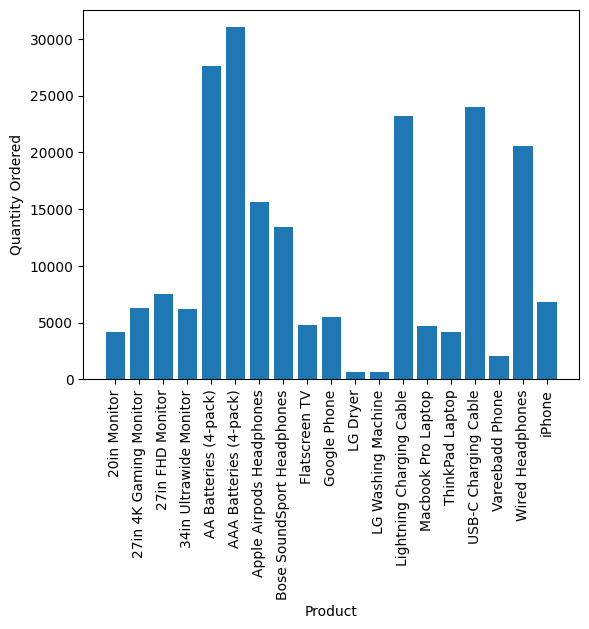

In [31]:
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation = 'vertical', size = 10)
plt.show()

In [66]:
prices = all_data.groupby('Product').mean(numeric_only = True)['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

#### Ans. Most Sold: AAA-Batteries (4 Pack) [Cheaper], Least Sold: LG Dryer [Costlier]

**Hypothesis**: Quantity is inversely proportional to its price<br /> <br />
**Exception:** 
Little bit of inconsistency in our insights for *Macbook & Thinkpad laptops*<br /><br />
Why? Because of certain demand of these laptops among the youth

C:\Users\tahir\AppData\Local\Temp\ipykernel_6128\538409317.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation = 'vertical', size = 10)


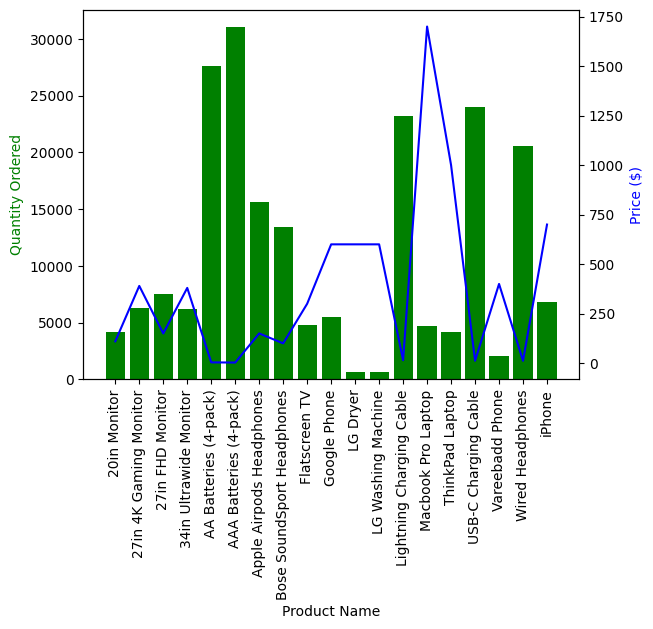

In [73]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 10)
plt.show()